In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib.dates import MonthLocator, DateFormatter, YearLocator
from dateutil.relativedelta import relativedelta

In [230]:
data = pd.read_csv('IceCube_Gold_Bronze_Tracks.csv')

In [231]:
julian_dates = np.array(data['EVENTMJD'])

In [232]:
# checks if all dates are in order using the Julian calander dates
for i in range(len(julian_dates)-1):
    if julian_dates[i] > julian_dates[i+1]:
        print('does not work')

In [233]:
datetime_strings = np.array(data['START'])

In [234]:
# Cuts off the minute, second, and nanosecond from the datetime strings
date_strings = [datetime.strptime(dt_str, '%Y-%m-%d %H:%M:%S.%f').strftime('%Y-%m-%d') for dt_str in datetime_strings]

In [235]:
dates = [datetime.strptime(date, '%Y-%m-%d') for date in date_strings]

In [236]:
bin_months = np.arange(1,12+bin_width,bin_width)

In [237]:
# Makes sure the bins start at January or July depending on the first date
if min(dates).month < 6:
    start_date_bin = min(dates).replace(month=1)
else:
    start_date_bin = min(dates).replace(month=7)

In [268]:
# delta is the number of months in each bin
delta = 6
end_date_bin = max(dates)+ relativedelta(months=+delta)

In [269]:
# Creates bins by adding delta months each time
bin_edges = np.arange(np.datetime64(start_date_bin), end_date_bin,  np.timedelta64(delta, 'M'),   dtype='datetime64[M]')

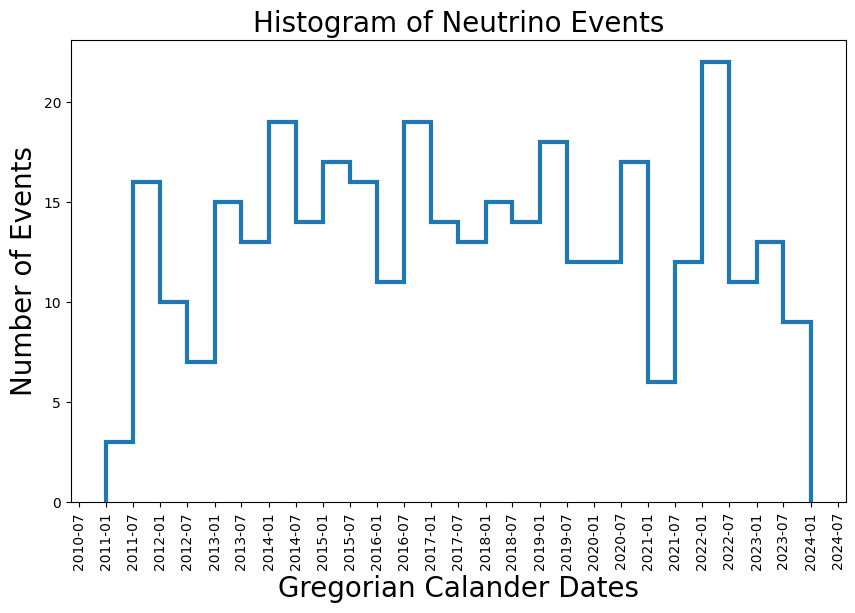

In [270]:
# Creates the plot
plt.figure(figsize=(10, 6))
n = plt.hist(dates, bins=bin_edges, histtype = 'step', linewidth = 3)
plt.gca().xaxis.set_major_locator(MonthLocator(bymonth=(1, 7)))
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m'))
plt.xticks(rotation=90)
plt.title('Histogram of Neutrino Events',fontsize = 20)
plt.xlabel('Gregorian Calander Dates',fontsize = 20)
plt.ylabel('Number of Events',fontsize = 20)
plt.yticks(fontsize = 10);
plt.xticks(fontsize = 10);